# Introduction to Spacy with NLP - Part 2

# Processing Pipelines

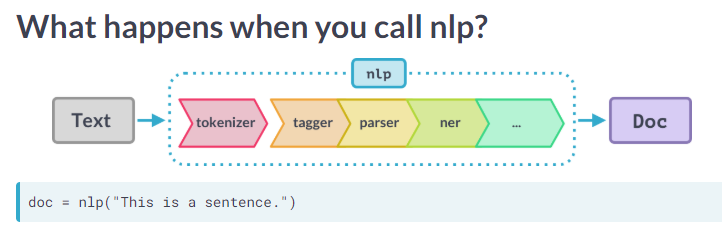

The tokenizer turns a string of text into a Doc "object.spaCy" then applies every component in the pipeline on document, in order.

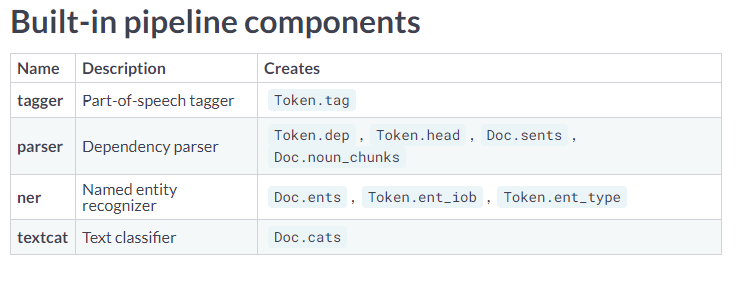

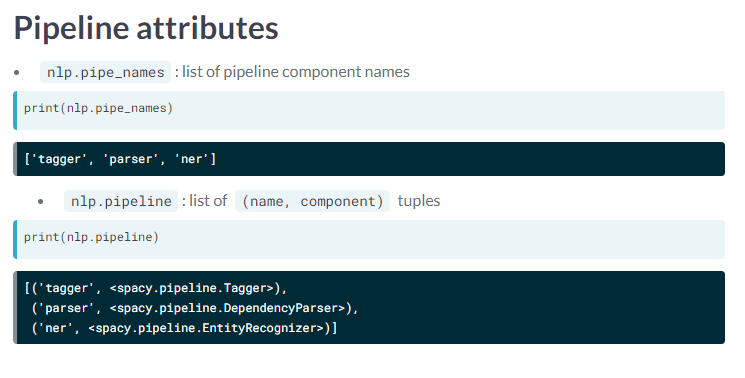

In [31]:
# Import the Libraries

import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Print the names of the pipeline components
print(nlp.pipe_names)

# Print the full pipeline of (name, component) tuples
print(nlp.pipeline) 

['tagger', 'parser', 'ner']
[('tagger', <spacy.pipeline.pipes.Tagger object at 0x000001F507FF76D8>), ('parser', <spacy.pipeline.pipes.DependencyParser object at 0x000001F5078FD528>), ('ner', <spacy.pipeline.pipes.EntityRecognizer object at 0x000001F5078FDAC8>)]


## Custom Pipeline Components

Lets you add Own Function to the Spacy Pipeline that is executed when calling NLP objects on a text

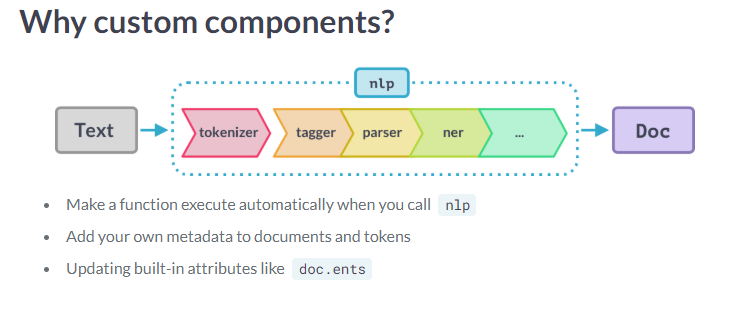

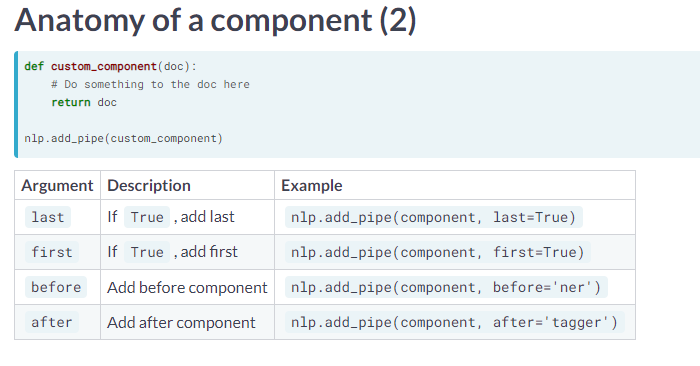

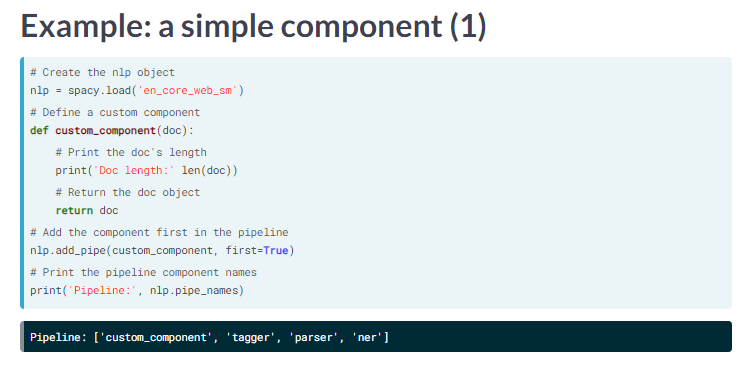

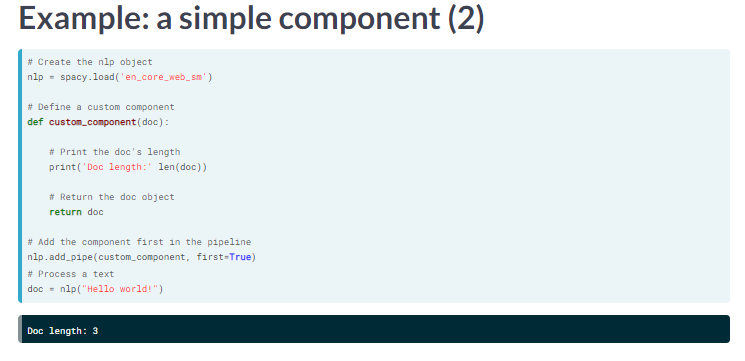

Custom components are great for adding custom values to documents, tokens and spans, and customizing the "doc.ents"

In [28]:
# Define the custom component
def length_component(doc):
    # Get the doc's length
    doc_length = len(doc)
    print("This document is {} tokens long.".format(doc_length))
    # Return the doc
    return doc

# Load the small English model
nlp = spacy.load('en_core_web_sm')
  
# Add the component first in the pipeline and print the pipe names
nlp.add_pipe(length_component, first=True)
print(nlp.pipe_names)

['length_component', 'tagger', 'parser', 'ner']


In [4]:
# Define the custom component
def length_component(doc):
    # Get the doc's length
    doc_length = len(doc)
    print("This document is {} tokens long.".format(doc_length))
    # Return the doc
    return doc
  
# Load the small English model and Add the component first in the pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe(length_component, first=True)

# Process a text
doc = nlp("This is a sentence.")

This document is 5 tokens long.


### Complex components

In this exercise, you'll be writing a custom component that uses the PhraseMatcher to find animal names in the document and adds the matched spans to the doc.ents.

A PhraseMatcher with the animal patterns has already been created as the variable matcher. The small English model is available as the variable nlp. 

In [6]:
# Define the custom component
def animal_component(doc):
    # Apply the matcher to the doc
    matches = matcher(doc)
    # Create a Span for each match and assign the label 'ANIMAL'
    spans = [Span(doc, start, end, label='ANIMAL')
             for match_id, start, end in matches]
    # Overwrite the doc.ents with the matched spans
    doc.ents = spans
    return doc

# Already Span has been Patterned with animal_patterns: [Golden Retriever, cat, turtle, Rattus norvegicus]

In [10]:
# Define the custom component
def animal_component(doc):
    # Apply the matcher to the doc
    matches = matcher(doc)
    # Create a Span for each match and assign the label 'ANIMAL'
    spans = [Span(doc, start, end, label='ANIMAL')
             for match_id, start, end in matches]
    # Overwrite the doc.ents with the matched spans
    doc.ents = spans
    return doc
    
nlp.add_pipe(animal_component, after="ner")

print(nlp.pipe_names)

ValueError: [E007] 'animal_component' already exists in pipeline. Existing names: ['length_component', 'tagger', 'parser', 'ner', 'animal_component']

In [11]:
# Define the custom component
def animal_component(doc):
    # Create a Span for each match and assign the label 'ANIMAL'
    # and overwrite the doc.ents with the matched spans
    doc.ents = [Span(doc, start, end, label='ANIMAL')
                for match_id, start, end in matcher(doc)]
    return doc
    
# Add the component to the pipeline after the 'ner' component 
### nlp.add_pipe(animal_component, after='ner')

# Process the text and print the text and label for the doc.ents
doc = nlp("I have a cat and a Golden Retriever")
print([(ent.text, ent.label_) for ent in doc.ents])

This document is 8 tokens long.


NameError: name 'matcher' is not defined

## Extension Attributes

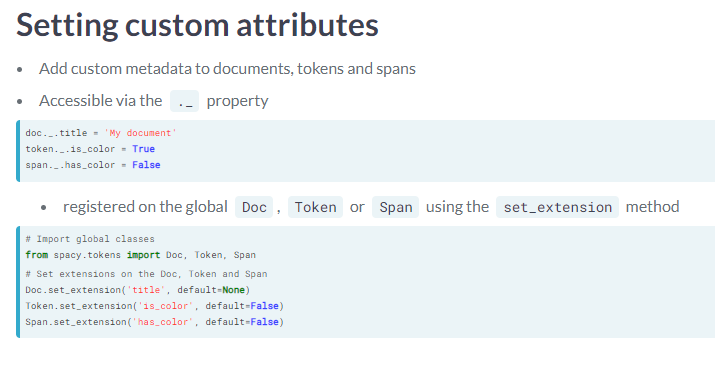

In [12]:
# The nlp object has already been created for you and the Doc, Token and Span classes are already imported in DC

# Register the Token extension attribute 'is_country' with the default value False
Token.set_extension('is_country', default=False, force=True)

# Process the text and set the is_country attribute to True for the token "Spain"
doc = nlp("I live in Spain.")
doc[3]._.is_country = True

# Print the token text and the is_country attribute for all tokens
print([(token.text, token._.is_country) for token in doc])

NameError: name 'Token' is not defined

In [14]:
'''
# Define the getter function that takes a token and returns its reversed text
def get_reversed(token):
    return token.text[::-1]
  
# Register the Token property extension 'Token.set_extension' with the getter get_reversed
Token.set_extension('reversed', getter=get_reversed)

# Process the text and print the reversed attribute for each token
doc = nlp("All generalizations are false, including this one.")
for token in doc:
    print('reversed:', token._.reversed)

'''

'\n# Define the getter function that takes a token and returns its reversed text\ndef get_reversed(token):\n    return token.text[::-1]\n  \n# Register the Token property extension \'Token.set_extension\' with the getter get_reversed\nToken.set_extension(\'reversed\', getter=get_reversed)\n\n# Process the text and print the reversed attribute for each token\ndoc = nlp("All generalizations are false, including this one.")\nfor token in doc:\n    print(\'reversed:\', token._.reversed)\n\n'

In [17]:
'''
# Define the getter function
def get_has_number(doc):
    # Return if any of the tokens in the doc return True for token.like_num
    return any(token.like_num for token in doc)

# Register the Doc property extension 'has_number' with the getter get_has_number
Doc.set_extension('has_number', getter =get_has_number)

# Process the text and check the custom has_number attribute 
doc = nlp("The museum closed for five years in 2012.")
print('has_number:', doc._.has_number)

# Define the method
def to_html(span, tag):
    # Wrap the span text in a HTML tag and return it
    return '<{tag}>{text}</{tag}>'.format(tag=tag, text=span.text)

# Register the Span property extension 'to_html' with the method to_html
Span.set_extension('to_html', method= to_html)

# Process the text and call the to_html method on the span with the tag name 'strong'
doc = nlp("Hello world, this is a sentence.")
span = doc[0:2]
print(span._.to_html('strong'))
'''

'\n# Define the getter function\ndef get_has_number(doc):\n    # Return if any of the tokens in the doc return True for token.like_num\n    return any(token.like_num for token in doc)\n\n# Register the Doc property extension \'has_number\' with the getter get_has_number\nDoc.set_extension(\'has_number\', getter =get_has_number)\n\n# Process the text and check the custom has_number attribute \ndoc = nlp("The museum closed for five years in 2012.")\nprint(\'has_number:\', doc._.has_number)\n\n# Define the method\ndef to_html(span, tag):\n    # Wrap the span text in a HTML tag and return it\n    return \'<{tag}>{text}</{tag}>\'.format(tag=tag, text=span.text)\n\n# Register the Span property extension \'to_html\' with the method to_html\nSpan.set_extension(\'to_html\', method= to_html)\n\n# Process the text and call the to_html method on the span with the tag name \'strong\'\ndoc = nlp("Hello world, this is a sentence.")\nspan = doc[0:2]\nprint(span._.to_html(\'strong\'))\n'

In [18]:
def get_wikipedia_url(span):
    # Get a Wikipedia URL if the span has one of the labels
    if span.label_  in ('PERSON', 'ORG', 'GPE', 'LOCATION'):
        entity_text = span.text.replace(' ', '_')
        return "https://en.wikipedia.org/w/index.php?search=" + entity_text

# Set the Span extension wikipedia_url using get getter get_wikipedia_url
Span.set_extension('wikipedia_url', getter=get_wikipedia_url)

doc = nlp("In over fifty years from his very first recordings right through to his last album, David Bowie was at the vanguard of contemporary culture.")

for ent in doc.ents:
    # Print the text and Wikipedia URL of the entity
    print(ent.text, ent._.wikipedia_url)

NameError: name 'Span' is not defined

In [19]:
# Components with Extensions

def countries_component(doc):
    # Create an entity Span with the label 'GPE' for all matches
    doc.ents = [Span(doc, start, end, label='GPE')
                for match_id, start, end in matcher(doc)]
    return doc

# Add the component to the pipeline
nlp.add_pipe(countries_component)
print(nlp.pipe_names)

['length_component', 'tagger', 'parser', 'ner', 'animal_component', 'countries_component']


In [21]:
def countries_component(doc):
    # Create an entity Span with the label 'GPE' for all matches
    doc.ents = [Span(doc, start, end, label='GPE')
                for match_id, start, end in matcher(doc)]
    return doc

# Add the component to the pipeline
nlp.add_pipe(countries_component)

# Register capital and getter that looks up the span text in country capitals
Span.set_extension('capital', getter=lambda span: capitals.get(span.text))

# Process the text and print the entity text, label and capital attributes
doc = nlp("Czech Republic may help Slovakia protect its airspace")
print([(ent.text, ent.label_, ent._.capital) for ent in doc.ents])

ValueError: [E007] 'countries_component' already exists in pipeline. Existing names: ['length_component', 'tagger', 'parser', 'ner', 'animal_component', 'countries_component']

## Scaling and Performance

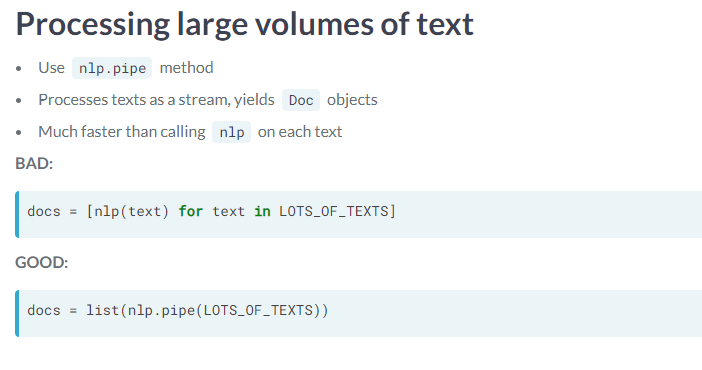

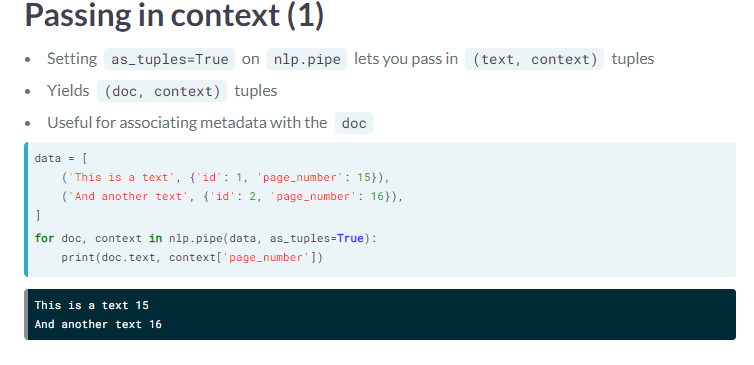

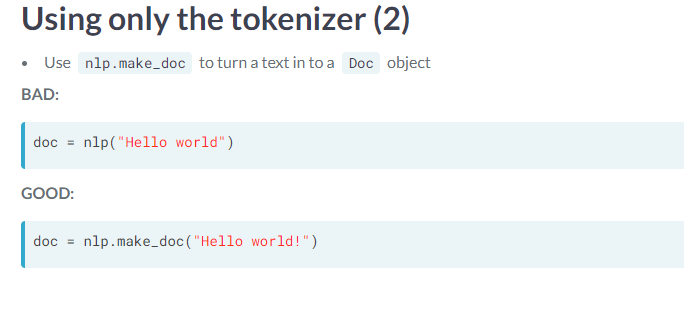

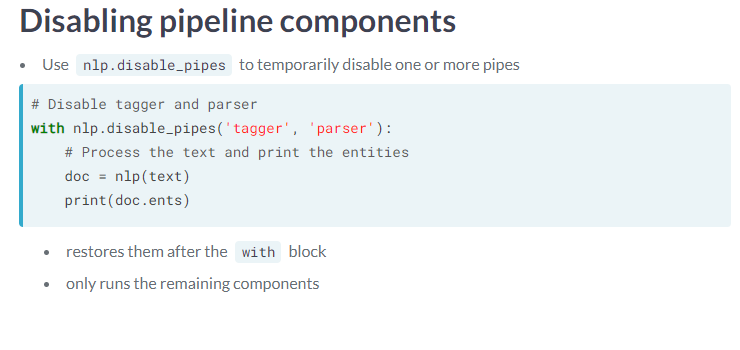

In [32]:
# If Any Problem COmes, use the Below to create a New Instance

# Import the Libraries

import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Print the names of the pipeline components
print(nlp.pipe_names)

# Print the full pipeline of (name, component) tuples
print(nlp.pipeline) 

['tagger', 'parser', 'ner']
[('tagger', <spacy.pipeline.pipes.Tagger object at 0x000001F507841EB8>), ('parser', <spacy.pipeline.pipes.DependencyParser object at 0x000001F507842DC8>), ('ner', <spacy.pipeline.pipes.EntityRecognizer object at 0x000001F507842FA8>)]


In [33]:
TEXTS = ['McDonalds is my favorite restaurant.',
 'Here I thought @McDonalds only had precooked burgers but it seems they only have not cooked ones?? I have no time to get sick..',
 'People really still eat McDonalds :(',
 'The McDonalds in Spain has chicken wings. My heart is so happy ',
 '@McDonalds Please bring back the most delicious fast food sandwich of all times!!....The Arch Deluxe :P',
 'please hurry and open. I WANT A #McRib SANDWICH SO BAD! :D',
 'This morning i made a terrible decision by gettin mcdonalds and now my stomach is payin for it']

In [38]:
# Process the texts and print the adjectives
for text in TEXTS:
    doc = nlp(text)
    print([token.text for token in doc if token.pos_ == 'ADJ'])

['favorite']
['sick']
[]
['happy']
['delicious', 'fast']
[]
['terrible', 'gettin', 'payin']


In [41]:
# You Can do the above with great ease and speed with the Pipe Operator

# Process the texts and print the adjectives
for doc in nlp.pipe(TEXTS):
    print([token.text for token in doc if token.pos_ == 'ADJ'])


['favorite']
['sick']
[]
['happy']
['delicious', 'fast']
[]
['terrible', 'gettin', 'payin']


In [42]:
# Process the texts and print the entities
docs = list(nlp.pipe(TEXTS))
entities = [doc.ents for doc in docs]
print(*entities)

(McDonalds,) (@McDonalds,) (McDonalds,) (McDonalds, Spain) (The Arch Deluxe,) (WANT, McRib) (This morning,)


In [45]:
people = ['David Bowie', 'Angela Merkel', 'Lady Gaga']

# Create a list of patterns for the PhraseMatcher
#patterns = [nlp(person) for person in people]
patterns = list(nlp.pipe(people))

#### Processing Data With Content

In [46]:
# Import the Doc class
from spacy.tokens import Doc

# Register the Doc extension 'author' (default None)
Doc.set_extension('author', default = None)

# Register the Doc extension 'book' (default None)
Doc.set_extension('book', default = None)


In [49]:
DATA = [('One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.',
  {'author': 'Franz Kafka', 'book': 'Metamorphosis'}),
 ("I know not all that may be coming, but be it what it will, I'll go to it laughing.",
  {'author': 'Herman Melville', 'book': 'Moby-Dick or, The Whale'}),
 ('It was the best of times, it was the worst of times.',
  {'author': 'Charles Dickens', 'book': 'A Tale of Two Cities'}),
 ('The only people for me are the mad ones, the ones who are mad to live, mad to talk, mad to be saved, desirous of everything at the same time, the ones who never yawn or say a commonplace thing, but burn, burn, burn like fabulous yellow roman candles exploding like spiders across the stars.',
  {'author': 'Jack Kerouac', 'book': 'On the Road'}),
 ('It was a bright cold day in April, and the clocks were striking thirteen.',
  {'author': 'George Orwell', 'book': '1984'}),
 ('Nowadays people know the price of everything and the value of nothing.',
  {'author': 'Oscar Wilde', 'book': 'The Picture Of Dorian Gray'})]

In [50]:
# Import the Doc class and register the extensions 'author' and 'book'
from spacy.tokens import Doc
Doc.set_extension('book', default=None, force=True)
Doc.set_extension('author', default=None, force=True)

for doc, context in nlp.pipe(DATA, as_tuples=True):
    # Set the doc._.book and doc._.author attributes from the context
    doc._.book = context['book']
    doc._.author = context['author']
    
    # Print the text and custom attribute data
    print(doc.text, '\n', "— '{}' by {}".format(doc._.book, doc._.author), '\n')

One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. 
 — 'Metamorphosis' by Franz Kafka 

I know not all that may be coming, but be it what it will, I'll go to it laughing. 
 — 'Moby-Dick or, The Whale' by Herman Melville 

It was the best of times, it was the worst of times. 
 — 'A Tale of Two Cities' by Charles Dickens 

The only people for me are the mad ones, the ones who are mad to live, mad to talk, mad to be saved, desirous of everything at the same time, the ones who never yawn or say a commonplace thing, but burn, burn, burn like fabulous yellow roman candles exploding like spiders across the stars. 
 — 'On the Road' by Jack Kerouac 

It was a bright cold day in April, and the clocks were striking thirteen. 
 — '1984' by George Orwell 

Nowadays people know the price of everything and the value of nothing. 
 — 'The Picture Of Dorian Gray' by Oscar Wilde 



#### Selective Processing

In [51]:
# Make a Document Directly without using nlp('-')

text = "Chick-fil-A is an American fast food restaurant chain headquartered in the city of College Park, Georgia, specializing in chicken sandwiches."

# Only tokenize the text
doc = nlp.make_doc(text)

print([token.text for token in doc])

['Chick', '-', 'fil', '-', 'A', 'is', 'an', 'American', 'fast', 'food', 'restaurant', 'chain', 'headquartered', 'in', 'the', 'city', 'of', 'College', 'Park', ',', 'Georgia', ',', 'specializing', 'in', 'chicken', 'sandwiches', '.']


In [52]:
text = "Chick-fil-A is an American fast food restaurant chain headquartered in the city of College Park, Georgia, specializing in chicken sandwiches."

# Disable the tagger and parser
with nlp.disable_pipes('tagger', 'parser'):
    # Process the text
    doc = nlp(text)
    # Print the entities in the doc
    print(doc.ents)

(American, College Park, Georgia)


# Training and Updating the Models

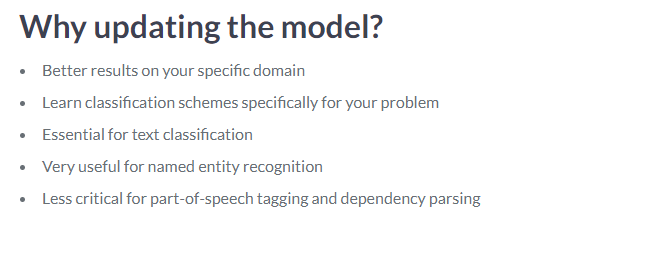

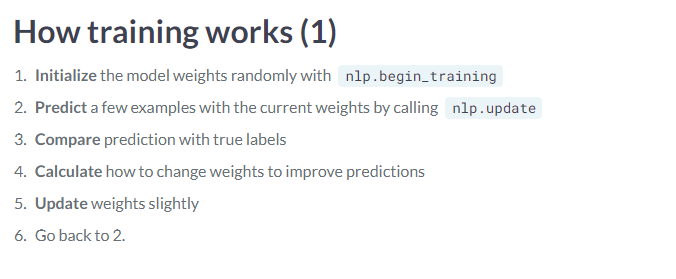

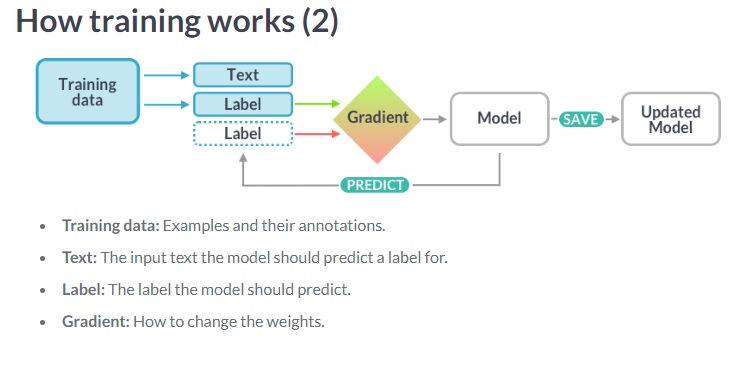

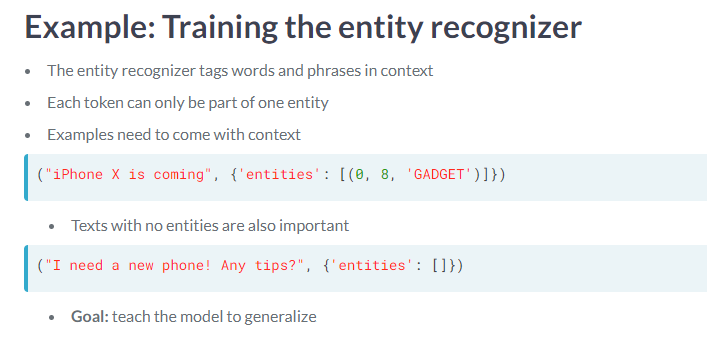

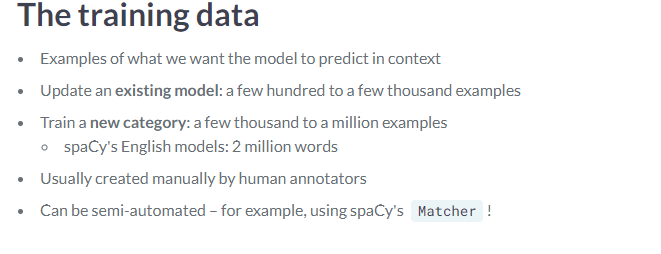

spaCy's components are supervised models for text annotations, meaning they can only learn to reproduce examples, not guess new labels from raw text.



## Creating training data (1)

In [66]:
# Importing the Libraries

import spacy
import random
from spacy.matcher import Matcher

# Load a model and create the nlp object
nlp = spacy.load('en_core_web_sm')

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)


In [57]:
# Two tokens whose lowercase forms match 'iphone' and 'x'
pattern1 = [{'LOWER': 'iphone'}, {'LOWER': 'x'}]

# Token whose lowercase form matches 'iphone' and an optional digit
pattern2 = [{'LOWER': 'iphone'}, {'IS_DIGIT': True, 'OP': '?'}]

# Add patterns to the matcher
matcher.add('GADGET', None, pattern1, pattern2)

In [59]:
# Data

TEXTS = ['How to preorder the iPhone X',
 'iPhone X is coming',
 'Should I pay $1,000 for the iPhone X?',
 'The iPhone 8 reviews are here',
 'Your iPhone goes up to 11 today',
 'I need a new phone! Any tips?']


In [60]:
# Create a Doc object for each text in TEXTS
for doc in nlp.pipe(TEXTS):
    # Find the matches in the doc
    matches = matcher(doc)
    
    # Get a list of (start, end, label) tuples of matches in the text
    entities = [(start, end, 'GADGET') for match_id, start, end in matches]
    print(doc.text, entities)    

How to preorder the iPhone X [(4, 6, 'GADGET'), (4, 5, 'GADGET')]
iPhone X is coming [(0, 2, 'GADGET'), (0, 1, 'GADGET')]
Should I pay $1,000 for the iPhone X? [(7, 9, 'GADGET'), (7, 8, 'GADGET')]
The iPhone 8 reviews are here [(1, 3, 'GADGET')]
Your iPhone goes up to 11 today [(1, 2, 'GADGET')]
I need a new phone! Any tips? []


In [62]:
# Creating a Training Data 2

TRAINING_DATA = []

# Create a Doc object for each text in TEXTS
for doc in nlp.pipe(TEXTS):
    # Match on the doc and create a list of matched spans
    spans = [doc[start:end] for match_id, start, end in matcher(doc)]
    # Get (start character, end character, label) tuples of matches
    entities = [(span.start_char, span.end_char, 'GADGET') for span in spans]
    
    # Format the matches as a (doc.text, entities) tuple
    training_example = (doc.text, {'entities': entities})
    # Append the example to the training data
    TRAINING_DATA.append(training_example)
    
print(*TRAINING_DATA, sep='\n')    

# Before you train a model with the data, you always want to double-check that your matcher didn't identify any false 
# positives. But that process is still much faster than doing everything manually.

('How to preorder the iPhone X', {'entities': [(20, 28, 'GADGET'), (20, 26, 'GADGET')]})
('iPhone X is coming', {'entities': [(0, 8, 'GADGET'), (0, 6, 'GADGET')]})
('Should I pay $1,000 for the iPhone X?', {'entities': [(28, 36, 'GADGET'), (28, 34, 'GADGET')]})
('The iPhone 8 reviews are here', {'entities': [(4, 12, 'GADGET')]})
('Your iPhone goes up to 11 today', {'entities': [(5, 11, 'GADGET')]})
('I need a new phone! Any tips?', {'entities': []})


### The Training Loop

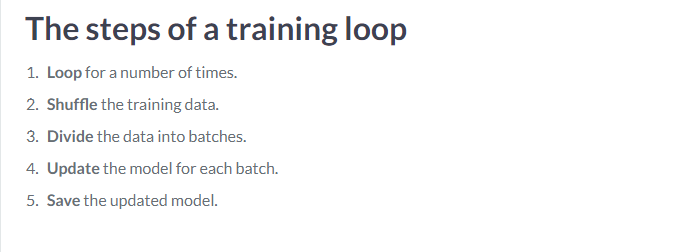

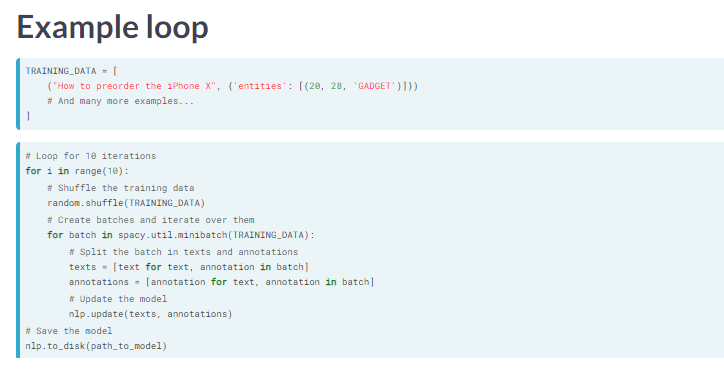

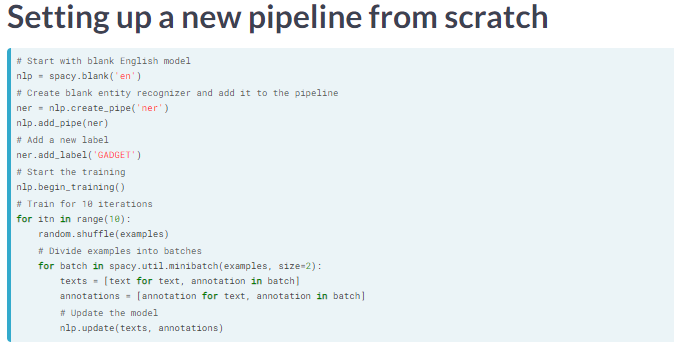

In [67]:
# Setting up the pipeline

# Create a blank 'en' model
nlp = spacy.blank('en')

# Create a new entity recognizer and add it to the pipeline
ner = nlp.create_pipe('ner')
nlp.add_pipe(ner)

# Add the label 'GADGET' to the entity recognizer
ner.add_label('GADGET')

# The pipeline is now ready, so let's start writing the training loop.

In [68]:
# Start the training
nlp.begin_training()

# Loop for 10 iterations
for itn in range(10):
    # Shuffle the training data
    random.shuffle(TRAINING_DATA)
    losses = {}
    
    # Batch the examples and iterate over them
    for batch in spacy.util.minibatch(TRAINING_DATA, size=2):
        texts = [text for text, entities in batch]
        annotations = [entities for text, entities in batch]
        
        # Update the model
        nlp.update(texts, annotations, losses=losses)
        print(losses)

{'ner': 10.399999558925629}
{'ner': 20.272059619426727}
{'ner': 31.345158755779266}
{'ner': 8.704681634902954}
{'ner': 15.126899600028992}
{'ner': 18.6757253408432}
{'ner': 3.039229728281498}
{'ner': 4.597571585327387}
{'ner': 7.667456135968678}
{'ner': 2.073890922620194}
{'ner': 3.3609384030423826}
{'ner': 4.928103660742636}
{'ner': 1.3675233552639838}
{'ner': 1.6525348443301482}
{'ner': 2.3366354580557527}
{'ner': 7.956465881317854}
{'ner': 7.974705969796901}
{'ner': 8.041136558882386}
{'ner': 2.360860331595177}
{'ner': 2.366398833712992}
{'ner': 2.370676847620075}
{'ner': 0.000509241366188462}
{'ner': 0.0005483129998111735}
{'ner': 3.1370723427598506}
{'ner': 2.9344639687067797e-05}
{'ner': 2.285884720626699}
{'ner': 2.285892610435472}
{'ner': 3.3335377082055473e-06}
{'ner': 5.610163447661298e-06}
{'ner': 1.763791388846534}


you've successfully trained your first spaCy model. The numbers printed to the IPython shell represent the loss on each iteration, the amount of work left for the optimizer. The lower the number, the better. In real life, you normally want to use a lot more data than this, ideally at least a few hundred or a few thousand examples.

## Exploring the model

In [69]:
TEST_DATA = ['Apple is slowing down the iPhone 8 and iPhone X - how to stop it',
 "I finally understand what the iPhone X 'notch' is for",
 'Everything you need to know about the Samsung Galaxy S9',
 'Looking to compare iPad models? Here’s how the 2018 lineup stacks up',
 'The iPhone 8 and iPhone 8 Plus are smartphones designed, developed, and marketed by Apple',
 'what is the cheapest ipad, especially ipad pro???',
 'Samsung Galaxy is a series of mobile computing devices designed, manufactured and marketed by Samsung Electronics']

In [70]:
# Process each text in TEST_DATA
for doc in nlp.pipe(TEST_DATA):
    # Print the document text and entitites
    print(doc.text)
    print(doc.ents, '\n\n')

Apple is slowing down the iPhone 8 and iPhone X - how to stop it
(iPhone, iPhone) 


I finally understand what the iPhone X 'notch' is for
(iPhone,) 


Everything you need to know about the Samsung Galaxy S9
() 


Looking to compare iPad models? Here’s how the 2018 lineup stacks up
(iPad,) 


The iPhone 8 and iPhone 8 Plus are smartphones designed, developed, and marketed by Apple
(iPhone, iPhone) 


what is the cheapest ipad, especially ipad pro???
() 


Samsung Galaxy is a series of mobile computing devices designed, manufactured and marketed by Samsung Electronics
() 




## Training Best Practices

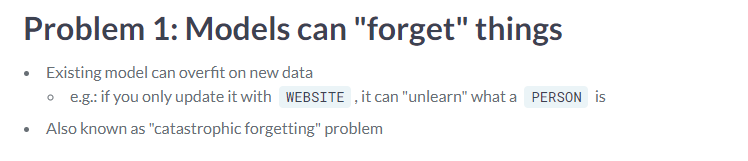

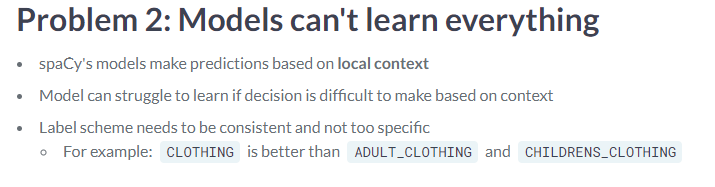

In [72]:
# Good Way of Querying

TRAINING_DATA = [
    ("i went to amsterdem last year and the canals were beautiful", {'entities': [(10, 19, 'GPE')]}),
    ("You should visit Paris once in your life, but the Eiffel Tower is kinda boring", {'entities': [(17, 22, 'GPE')]}),
    ("There's also a Paris in Arkansas, lol", {'entities': [(15, 20, 'GPE'), (24, 32, 'GPE')]}),
    ("Berlin is perfect for summer holiday: lots of parks, great nightlife, cheap beer!", {'entities': [(0, 6, 'GPE')]})
]

print(*TRAINING_DATA, sep='\n')

('i went to amsterdem last year and the canals were beautiful', {'entities': [(10, 19, 'GPE')]})
('You should visit Paris once in your life, but the Eiffel Tower is kinda boring', {'entities': [(17, 22, 'GPE')]})
("There's also a Paris in Arkansas, lol", {'entities': [(15, 20, 'GPE'), (24, 32, 'GPE')]})
('Berlin is perfect for summer holiday: lots of parks, great nightlife, cheap beer!', {'entities': [(0, 6, 'GPE')]})


In [73]:
# Training Multiple Labels

TRAINING_DATA = [
    ("Reddit partners with Patreon to help creators build communities", 
     {'entities': [(0, 6, 'WEBSITE'), (21, 28, 'WEBSITE')]}),
  
    ("PewDiePie smashes YouTube record", 
     {'entities': [(18, 25, 'WEBSITE')]}),
  
    ("Reddit founder Alexis Ohanian gave away two Metallica tickets to fans", 
     {'entities': [(0, 6, 'WEBSITE')]}),
    # And so on...
]

The Model wont perform better on PERSON as there is no Data Present! After including both examples of the next WEBSITE entities, as well as existing entity types like PERSON, the model now performs much better.

In [75]:
TRAINING_DATA = [
    ("Reddit partners with Patreon to help creators build communities", 
     {'entities': [(0, 6, 'WEBSITE'), (21, 28, 'WEBSITE')]}),
  
    ("PewDiePie smashes YouTube record", 
     {'entities': [(0, 9, 'PERSON'), (18, 25, 'WEBSITE')]}),
  
    ("Reddit founder Alexis Ohanian gave away two Metallica tickets to fans", 
     {'entities': [(0, 6, 'WEBSITE'), (15, 29, 'PERSON')]}),
    # And so on...
]

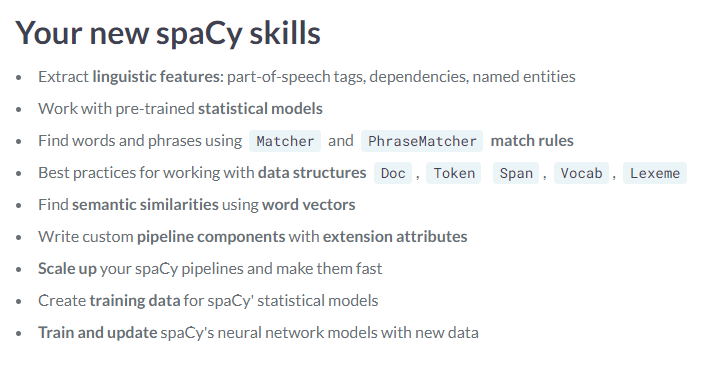